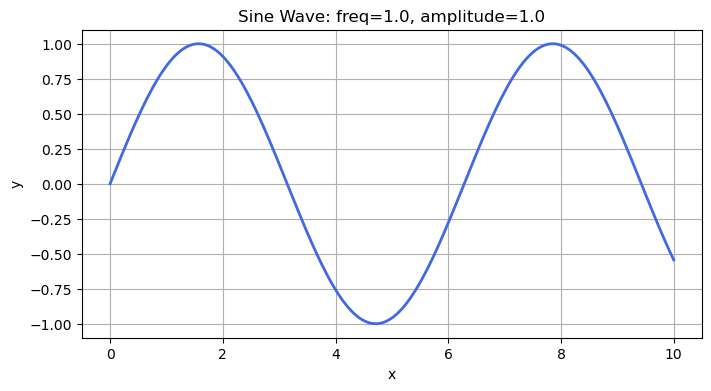

<function __main__.plot_func(freq=1.0, amplitude=1.0)>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

# Sample data
x = np.linspace(0, 10, 200)

# Function to plot based on parameters
def plot_func(freq=1.0, amplitude=1.0):
    y = amplitude * np.sin(freq * x)
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, color="royalblue", lw=2)
    plt.title(f"Sine Wave: freq={freq}, amplitude={amplitude}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

# Create interactive sliders
interact(plot_func, freq=(0.5, 5.0, 0.1), amplitude=(0.5, 3.0, 0.1))


<Figure size 640x480 with 0 Axes>

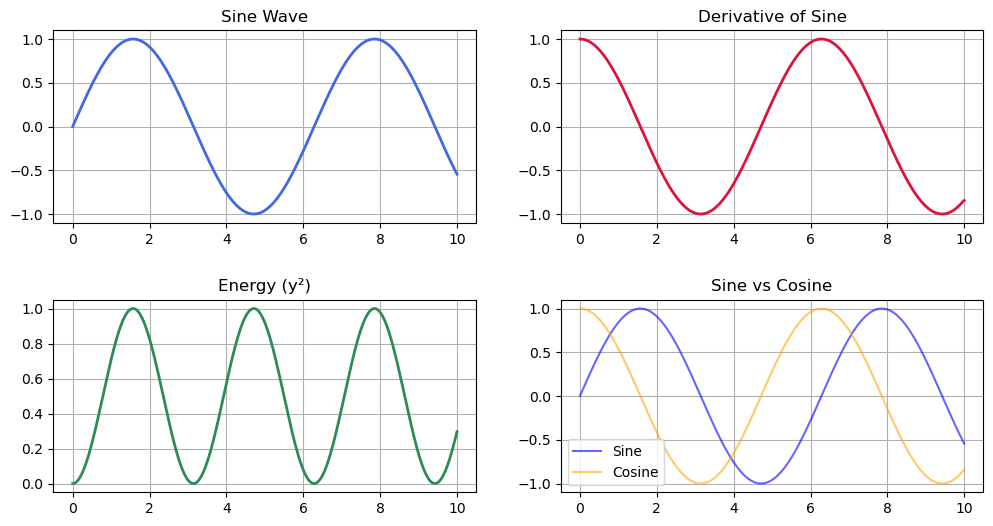

Output()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive_output, HBox, VBox, Dropdown, FloatSlider

x = np.linspace(0, 10, 400)

def update_dashboard(freq=1.0, amplitude=1.0, wave_type='Sine'):
    plt.clf()
    fig, axes = plt.subplots(2, 2, figsize=(12, 6))
    plt.subplots_adjust(hspace=0.4)

    if wave_type == 'Sine':
        y = amplitude * np.sin(freq * x)
    elif wave_type == 'Cosine':
        y = amplitude * np.cos(freq * x)
    elif wave_type == 'Tangent':
        y = amplitude * np.tan(freq * x)
        y[np.abs(y) > 5] = np.nan

    # Plot 1: Wave
    axes[0,0].plot(x, y, color='royalblue', lw=2)
    axes[0,0].set_title(f'{wave_type} Wave')
    axes[0,0].grid(True)

    # Plot 2: Derivative
    dy = np.gradient(y, x)
    axes[0,1].plot(x, dy, color='crimson', lw=2)
    axes[0,1].set_title(f'Derivative of {wave_type}')
    axes[0,1].grid(True)

    # Plot 3: Energy
    axes[1,0].plot(x, y**2, color='seagreen', lw=2)
    axes[1,0].set_title('Energy (y²)')
    axes[1,0].grid(True)

    # Plot 4: Combined
    axes[1,1].plot(x, np.sin(freq*x), label='Sine', color='blue', alpha=0.6)
    axes[1,1].plot(x, np.cos(freq*x), label='Cosine', color='orange', alpha=0.6)
    axes[1,1].legend()
    axes[1,1].set_title('Sine vs Cosine')
    axes[1,1].grid(True)

    plt.show()

# Controls
freq_slider = FloatSlider(value=1.0, min=0.5, max=5.0, step=0.1, description='Frequency:')
amp_slider = FloatSlider(value=1.0, min=0.5, max=3.0, step=0.1, description='Amplitude:')
wave_dropdown = Dropdown(options=['Sine', 'Cosine', 'Tangent'], value='Sine', description='Wave Type:')

ui = VBox([wave_dropdown, HBox([freq_slider, amp_slider])])
out = interactive_output(update_dashboard, {'freq': freq_slider, 'amplitude': amp_slider, 'wave_type': wave_dropdown})

display(ui, out)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, IntSlider, Dropdown, Button, VBox, HBox, Output
from IPython.display import display

# --- Prepare data ---
x = np.linspace(0, 10, 500)
out = Output()

# --- Simulation function ---
def simulate(freq, amp, steps, wave_type):
    t_values = np.linspace(0, 2*np.pi, steps)
    results = []
    for t in t_values:
        if wave_type == "Sine":
            y = amp * np.sin(freq * x + t)
        elif wave_type == "Cosine":
            y = amp * np.cos(freq * x + t)
        elif wave_type == "Tangent":
            y = amp * np.tan(freq * x + t)
            y[np.abs(y) > 5] = np.nan
        results.append(y)
    return results, t_values

# --- Plotting function ---
def visualize(freq, amp, steps, wave_type):
    with out:
        out.clear_output(wait=True)
        results, t_values = simulate(freq, amp, steps, wave_type)

        plt.figure(figsize=(10,5))
        for i, y in enumerate(results[::max(1, len(results)//20)]):  # plot a few frames
            plt.plot(x, y, alpha=0.4)
        plt.title(f"{wave_type} Wave Simulation — {steps} steps")
        plt.xlabel("x")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.show()

# --- Widgets ---
freq_slider = FloatSlider(value=1.0, min=0.5, max=5.0, step=0.1, description="Frequency:")
amp_slider = FloatSlider(value=1.0, min=0.5, max=3.0, step=0.1, description="Amplitude:")
steps_slider = IntSlider(value=20, min=5, max=100, step=5, description="Steps:")
wave_dropdown = Dropdown(options=["Sine", "Cosine", "Tangent"], value="Sine", description="Wave:")

simulate_btn = Button(description="Simulate & Visualize", button_style="success")

# --- Button action ---
def on_click(b):
    visualize(freq_slider.value, amp_slider.value, steps_slider.value, wave_dropdown.value)

simulate_btn.on_click(on_click)

# --- Layout ---
ui = VBox([
    HBox([wave_dropdown, freq_slider, amp_slider, steps_slider]),
    simulate_btn,
    out
])

display(ui)


In [7]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import matplotlib
matplotlib.use("TkAgg")
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

class WaveSimulatorApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Interactive Wave Simulator (Matplotlib + Tkinter)")
        self.root.geometry("900x600")
        self.root.configure(bg="#f2f2f2")

        # Parameters
        self.freq = tk.DoubleVar(value=1.0)
        self.amp = tk.DoubleVar(value=1.0)
        self.steps = tk.IntVar(value=20)
        self.wave_type = tk.StringVar(value="Sine")

        # Create layout
        self.create_widgets()
        self.create_plot()

    def create_widgets(self):
        # Control panel
        control_frame = ttk.LabelFrame(self.root, text="Simulation Controls", padding=10)
        control_frame.pack(side=tk.TOP, fill=tk.X, padx=10, pady=5)

        ttk.Label(control_frame, text="Wave Type:").pack(side=tk.LEFT, padx=5)
        ttk.Combobox(control_frame, textvariable=self.wave_type,
                     values=["Sine", "Cosine", "Tangent"], width=8).pack(side=tk.LEFT, padx=5)

        ttk.Label(control_frame, text="Frequency:").pack(side=tk.LEFT, padx=5)
        ttk.Scale(control_frame, from_=0.5, to=5.0, orient="horizontal",
                  variable=self.freq, length=150).pack(side=tk.LEFT, padx=5)

        ttk.Label(control_frame, text="Amplitude:").pack(side=tk.LEFT, padx=5)
        ttk.Scale(control_frame, from_=0.5, to=3.0, orient="horizontal",
                  variable=self.amp, length=150).pack(side=tk.LEFT, padx=5)

        ttk.Label(control_frame, text="Steps:").pack(side=tk.LEFT, padx=5)
        ttk.Spinbox(control_frame, from_=5, to=100, increment=5, textvariable=self.steps, width=5).pack(side=tk.LEFT, padx=5)

        ttk.Button(control_frame, text="Simulate & Visualize", command=self.simulate).pack(side=tk.RIGHT, padx=5)

    def create_plot(self):
        # Matplotlib figure
        self.fig, self.ax = plt.subplots(figsize=(8, 4))
        self.ax.set_title("Wave Simulation")
        self.ax.set_xlabel("x")
        self.ax.set_ylabel("Amplitude")
        self.ax.grid(True)

        # Canvas for embedding
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    def simulate(self):
        self.ax.clear()
        self.ax.grid(True)

        x = np.linspace(0, 10, 500)
        freq = self.freq.get()
        amp = self.amp.get()
        steps = self.steps.get()
        wave_type = self.wave_type.get()

        t_values = np.linspace(0, 2 * np.pi, steps)

        for t in t_values[::max(1, len(t_values)//25)]:
            if wave_type == "Sine":
                y = amp * np.sin(freq * x + t)
            elif wave_type == "Cosine":
                y = amp * np.cos(freq * x + t)
            elif wave_type == "Tangent":
                y = amp * np.tan(freq * x + t)
                y[np.abs(y) > 5] = np.nan
            self.ax.plot(x, y, alpha=0.4)

        self.ax.set_title(f"{wave_type} Wave Simulation — {steps} steps")
        self.ax.set_xlabel("x")
        self.ax.set_ylabel("Amplitude")
        self.ax.grid(True)
        self.canvas.draw()

# Run app
if __name__ == "__main__":
    root = tk.Tk()
    app = WaveSimulatorApp(root)
    root.mainloop()
